In [3]:
#from tkinter import *
import gurobipy as gp
from gurobipy import GRB
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

# Markowitz Minimum Variance

In [42]:
data = pd.read_csv('Closing_Price.csv')
stocks = data.columns
stocks

Index(['INDUSINDBK.csv', 'Reliance.csv', 'Bajaj_Finserv.csv', 'Axis.csv',
       'Kotakbank.csv', 'TITAN.csv', 'TECHM.csv', 'LT.csv', 'MarutiSuzuki.csv',
       'TATASTEEL.csv', 'Bharti_Airtel.csv', 'HDFC_BANK.csv',
       'Nestle_India.csv', 'TCS.csv', 'ITC.csv', 'HEROMOTOCO.csv', 'icici.csv',
       'ONGC.csv', 'HCL.csv', 'POWERGRID.csv', 'BAJAJ-AUTO.csv', 'HU.csv',
       'Infosys.csv', 'ULTRACEMCO.csv', 'SBI.csv', 'Sun_Pharma.csv',
       'NTPC.csv', 'MnM.csv', 'AsianPaints.csv', 'HDFC.csv'],
      dtype='object')

In [43]:
closes = np.transpose(np.array(data))       # matrix of daily closing prices
absdiff = np.diff(closes)                   # change in closing price each day
reldiff = np.divide(absdiff, closes[:,:-1]) # relative change in daily closing price
delta = np.mean(reldiff, axis=1)            # mean price change
sigma = np.cov(reldiff)                     # covariance (standard deviations)
std = np.std(reldiff, axis=1)               # standard deviation

In [45]:
reldiff.shape

(30, 119)

In [65]:
from scipy.spatial.distance import pdist, squareform
import numpy as np

# from numbapro import jit, float32

def distcorr(X, Y):
    """ Compute the distance correlation function
    
    >>> a = [1,2,3,4,5]
    >>> b = np.array([1,2,9,4,4])
    >>> distcorr(a, b)
    0.762676242417
    """
    X = np.atleast_1d(X)
    Y = np.atleast_1d(Y)
    if np.prod(X.shape) == len(X):
        X = X[:, None]
    if np.prod(Y.shape) == len(Y):
        Y = Y[:, None]
    X = np.atleast_2d(X)
    Y = np.atleast_2d(Y)
    n = X.shape[0]
    if Y.shape[0] != X.shape[0]:
        raise ValueError('Number of samples must match')
    a = squareform(pdist(X))
    b = squareform(pdist(Y))
    A = a - a.mean(axis=0)[None, :] - a.mean(axis=1)[:, None] + a.mean()
    B = b - b.mean(axis=0)[None, :] - b.mean(axis=1)[:, None] + b.mean()
    
    dcov2_xy = (A * B).sum()/((n * n)*1.0)
    dcov2_xx = (A * A).sum()/((n * n)*1.0)
    dcov2_yy = (B * B).sum()/((n * n)*1.0)
    dcor = np.sqrt(dcov2_xy)/np.sqrt(np.sqrt(dcov2_xx) * np.sqrt(dcov2_yy))
    return dcor


In [74]:
distcorr(reldiff[0],reldiff[29])

0.3692524945910265

In [76]:
for i in range(0,10):
    print(i)

0
1
2
3
4
5
6
7
8
9


[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [84]:
sigma2 = [ [0]*30for i in range(30)]
sigma2
for i in range(0,30):
    for j in range(0,30):
        sigma2[i][j] = distcorr(reldiff[i], reldiff[j])

In [85]:
sigma2

[[1.0,
  0.3716610394212987,
  0.48438431997437764,
  0.41910385805275063,
  0.26085393531942164,
  0.2607651827871817,
  0.19637295157336873,
  0.3357431840053939,
  0.3104892370402881,
  0.27170983830086776,
  0.30656209361088715,
  0.34483297645126026,
  0.15194622828326543,
  0.3492138584548896,
  0.25178579555519454,
  0.23225966182244595,
  0.34757419262460804,
  0.29675312028445483,
  0.2915168916161226,
  0.20204495195656316,
  0.2820657981202834,
  0.19167223889864612,
  0.3164547992077803,
  0.2554600043354983,
  0.5225856347142693,
  0.1169819006311286,
  0.2462182355747918,
  0.2825982987718184,
  0.26789545721277064,
  0.3692524945910265],
 [0.3716610394212987,
  1.0,
  0.5407674806510854,
  0.43634416021981,
  0.3265595435636189,
  0.29898075465599494,
  0.2892196702493499,
  0.32927139836442115,
  0.33182369776796283,
  0.3617123132114185,
  0.2748011904236156,
  0.3680529624167841,
  0.33023240115217667,
  0.3733195713976151,
  0.3420259057916573,
  0.2837686448391859,


In [105]:
import numpy as np

def entropy(x):
    pr = np.bincount(x) / len(x)
    H = np.sum(pr * np.log2(pr))
    return -H

dice1 = np.arange(0,7)

def crossEntropy(x,y):
    prX = np.bincount(x) / len(x)
    prY = np.bincount(y) / len(y)
    H = np.sum(prX * np.log2(prY))
    return -H

def KL_divergence(x,y):
    prX = np.bincount(x) / len(x)
    prY = np.bincount(y) / len(y)
    H = np.sum(prX * np.log2(prY))
    kl = H - entropy(x)
    return kl

def jointDist(x,y):
    N = len(x)
    u = np.unique(np.append(x,y))
    joint = []
    for i in u:
        for j in u:
            f = x[np.logical_and(x == i, y == j)]
            joint.append(len(f)/N)
    return joint

def marginalProduct(x,y):
    N = len(x)
    u = np.unique(np.append(x,y))
    marginal = []
    for i in u:
        for j in u:
            fX = len(x[x == i]) / N
            fY = len(y[y == j]) / N 
            marginal.append(fX * fY)
    return marginal

def mutualInfo(x,y):
    joint = jointDist(x,y)
    marginal = marginalProduct(x,y)
    Hjm = -np.sum(joint[np.where(marginal > 0)] * np.log2(marginal[np.where(marginal > 0)]))
    Hj = -np.sum(joint[np.where(joint > 0)] * np.log2(joint[np.where(joint > 0)]))
    return Hjm - Hj

In [107]:
sigma3 = [ [0]*30for i in range(30)]
sigma3
for i in range(0,30):
    for j in range(0,30):
        sigma3[i][j] = mutualInfo(reldiff[i], reldiff[j])*std[i]*std[j]

TypeError: '>' not supported between instances of 'list' and 'int'

std

In [69]:
sigma[0][1]/(std[0]*std[1])

0.3960563800388543

In [52]:
import numpy as np
import scipy.spatial.distance as dist
import random

random.seed(1234)

def doubleCenter(x):
    centered = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            centered[i,j] = x[i,j] - np.mean(x[i,:]) - np.mean(x[:,j]) + np.mean(x)
    return centered

def distanceCovariance(x,y):
    N = len(x)
    distX = dist.pdist(x)
    distX = dist.squareform(distX)
    distY = dist.pdist(y)
    distY = dist.squareform(distY)
    centeredX = doubleCenter(distX)
    centeredY = doubleCenter(distY)
    calc = np.sum(centeredX * centeredY)
    return np.sqrt(calc/(N**2))

def distanceVariance(x):
    return distanceCovariance(x,x)

def distanceCorrelation(x,y):
    cov = distanceCovariance(x,y)
    sd = np.sqrt(distanceVariance(x)*distanceVariance(y))
    return cov/sd

# Compare with Pearson's r
x = np.arange(-10,11)
y = x**2 + np.random.normal(0,10,21)
print(np.corrcoef(x,y)[0,1]) # --> 0.057
print(distanceCorrelation(x,y)) # --> 0.509


-0.09337758388754679


ValueError: A 2-dimensional array must be passed.

In [56]:
from scipy.spatial.distance import pdist, squareform
import numpy as np
# !pip install numbapro
# from numbapro import jit, float32

def distcorr(X, Y):
    """ Compute the distance correlation function
    
    >>> a = [1,2,3,4,5]
    >>> b = np.array([1,2,9,4,4])
    >>> distcorr(a, b)
    0.762676242417
    """
    X = np.atleast_1d(X)
    Y = np.atleast_1d(Y)
    if np.prod(X.shape) == len(X):
        X = X[:, None]
    if np.prod(Y.shape) == len(Y):
        Y = Y[:, None]
    X = np.atleast_2d(X)
    Y = np.atleast_2d(Y)
    n = X.shape[0]
    if Y.shape[0] != X.shape[0]:
        raise ValueError('Number of samples must match')
    a = squareform(pdist(X))
    b = squareform(pdist(Y))
    A = a - a.mean(axis=0)[None, :] - a.mean(axis=1)[:, None] + a.mean()
    B = b - b.mean(axis=0)[None, :] - b.mean(axis=1)[:, None] + b.mean()
    
    dcov2_xy = (A * B).sum()/((n * n)*(1.0))
    dcov2_xx = (A * A).sum()/((n * n)*(1.0))
    dcov2_yy = (B * B).sum()/((n * n)*(1.0))
    dcor = np.sqrt(dcov2_xy)/np.sqrt(np.sqrt(dcov2_xx) * np.sqrt(dcov2_yy))
    return dcor


In [60]:
distcorr(reldiff[0], reldiff[1])

0.3716610394212987

In [6]:

# Create an empty model
m = gp.Model('portfolio')

# Add matrix variable for the stocks
x = m.addMVar(len(stocks))

# Objective is to minimize risk (squared).  This is modeled using the
# covariance matrix, which measures the historical correlation between stocks
portfolio_risk = x @ sigma @ x
m.setObjective(portfolio_risk, GRB.MINIMIZE)

# Fix budget with a constraint
m.addConstr(x.sum() == 1, 'budget')
#m.addConstr(x@delta >= 0.001, 'return')

# Verify model formulation
m.write('portfolio_selection_optimization.lp')

# Optimize model to find the minimum risk portfolio
m.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-04-25
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x3e2cf700
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-06, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.02s
Presolved: 1 rows, 30 columns, 30 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.350e+02
 Factor NZ  : 4.650e+02
 Factor Ops : 9.455e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Prima

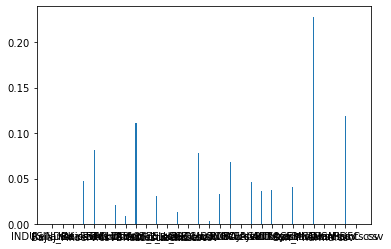

In [7]:
w = x.BarX
plt.bar(stocks, w, width = 0.1)
plt.savefig('weights.png')

In [8]:
minrisk_volatility = sqrt(m.ObjVal)
minrisk_return = delta @ x.X
print(minrisk_return,minrisk_volatility)

-8.724365504795341e-05 0.005119999022740381


In [9]:
# Create an expression representing the expected return for the portfolio
portfolio_return = delta @ x
target = m.addConstr(portfolio_return == max(0,minrisk_return), 'target')

# Solve for efficient frontier by varying target return
frontier = np.empty((2,0))
for r in np.linspace(delta.min(), delta.max(), 25):
    target.rhs = r
    m.optimize()
    frontier = np.append(frontier, [[sqrt(m.ObjVal)],[r]], axis=1)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 2 rows, 30 columns and 60 nonzeros
Model fingerprint: 0x09bc3687
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-05, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-06, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-03, 1e+00]
Presolve time: 0.00s
Presolved: 2 rows, 30 columns, 60 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.650e+02
 Factor NZ  : 4.960e+02
 Factor Ops : 1.042e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.90126773e+05 -2.90126773

Coefficient statistics:
  Matrix range     [2e-05, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-06, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e-04, 1e+00]
Presolve time: 0.00s
Presolved: 2 rows, 30 columns, 60 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.650e+02
 Factor NZ  : 4.960e+02
 Factor Ops : 1.042e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.90137059e+05 -2.90137059e+05  2.03e+04 2.84e-03  1.00e+06     0s
   1   6.95718038e+04 -6.95923056e+04  1.84e+03 2.58e-04  9.48e+04     0s
   2   2.04085163e+00 -2.71226691e+01  1.72e+01 2.42e-06  9.01e+02     0s
   3   5.52180554e-05 -2.50357965e+01  2.59e-02 3.64e-09  2.19e+00     0s
   4   4.40490476e-05 -7.52196808e+00  2.59e-08 3.64e-15  2.51e-01     0s
   5   4.4048

   0   2.90147345e+05 -2.90147345e+05  2.02e+04 2.62e-03  1.00e+06     0s
   1   6.95712812e+04 -6.95906660e+04  1.84e+03 2.38e-04  9.48e+04     0s
   2   2.04234577e+00 -2.65555303e+01  1.72e+01 2.23e-06  9.00e+02     0s
   3   4.60702957e-05 -2.45004182e+01  5.14e-03 6.65e-10  1.08e+00     0s
   4   4.36947336e-05 -1.64934796e+00  5.14e-09 6.65e-16  5.50e-02     0s
   5   4.36936495e-05 -1.65803917e-03  1.63e-13 5.50e-14  5.67e-05     0s
   6   4.27314990e-05 -9.22278420e-06  3.46e-15 1.17e-15  1.73e-06     0s
   7   2.96941531e-05 -1.44143070e-06  8.67e-18 2.10e-18  1.04e-06     0s
   8   2.73415102e-05  2.46551860e-05  3.47e-18 5.96e-19  8.95e-08     0s
   9   2.63234958e-05  2.61338465e-05  2.65e-17 8.69e-19  6.32e-09     0s
  10   2.62193993e-05  2.62115492e-05  4.25e-17 1.11e-18  2.62e-10     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.62193993e-05

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) 

   6   5.93691159e-05 -1.21478395e-04  2.03e-14 4.70e-15  6.03e-06     0s
   7   4.25090834e-05 -3.29530987e-06  1.39e-17 7.81e-18  1.53e-06     0s
   8   3.53947896e-05  1.79890587e-05  5.20e-18 1.30e-18  5.80e-07     0s
   9   3.21442310e-05  2.98244120e-05  6.94e-18 9.22e-19  7.73e-08     0s
  10   3.13410270e-05  3.11955251e-05  3.82e-17 1.49e-18  4.85e-09     0s
  11   3.12481911e-05  3.12422212e-05  1.11e-16 5.96e-19  1.99e-10     0s

Barrier solved model in 11 iterations and 0.00 seconds (0.00 work units)
Optimal objective 3.12481911e-05

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 2 rows, 30 columns and 60 nonzeros
Model fingerprint: 0x57c05596
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-05, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObj

   8   9.72273110e-05 -2.61854628e-04  6.94e-18 3.12e-17  1.20e-05     0s
   9   6.94346700e-05  1.85013448e-05  6.94e-18 8.67e-18  1.70e-06     0s
  10   5.62164541e-05  4.85042374e-05  1.73e-16 1.30e-18  2.57e-07     0s
  11   5.28361912e-05  5.17742144e-05  9.02e-17 8.67e-19  3.54e-08     0s
  12   5.21759579e-05  5.21400700e-05  4.16e-17 5.69e-19  1.20e-09     0s
  13   5.21481557e-05  5.21481194e-05  1.08e-16 9.76e-19  1.21e-12     0s

Barrier solved model in 13 iterations and 0.02 seconds (0.00 work units)
Optimal objective 5.21481557e-05

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 2 rows, 30 columns and 60 nonzeros
Model fingerprint: 0xec86f87e
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-05, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObj

   9   1.13601728e-04  1.10802652e-04  1.88e-15 3.59e-18  9.33e-08     0s
  10   1.11799894e-04  1.11769549e-04  3.26e-16 1.73e-18  1.01e-09     0s
  11   1.11774134e-04  1.11774104e-04  3.76e-16 1.73e-18  1.02e-12     0s

Barrier solved model in 11 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.11774134e-04

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 2 rows, 30 columns and 60 nonzeros
Model fingerprint: 0xc4585954
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-05, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-06, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Presolve time: 0.02s
Presolved: 2 rows, 30 columns, 60 nonzeros
Presolved model has 465 quadratic objective terms
Ordering tim

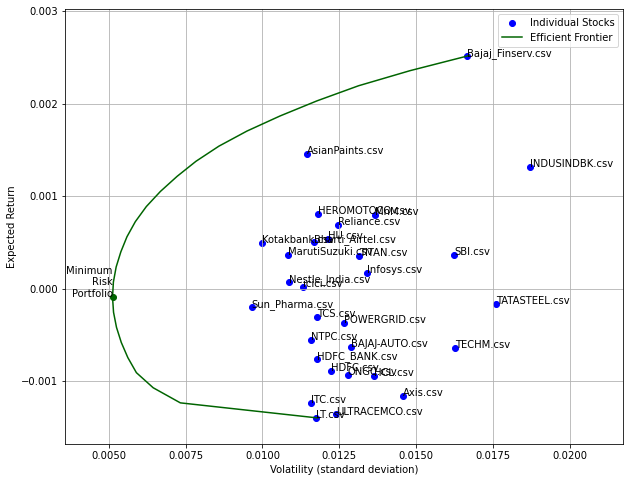

In [10]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(10,10))

fig, ax = plt.subplots(figsize=(10,8))

# Plot volatility versus expected return for individual stocks
ax.scatter(x=std, y=delta,
           color='Blue', label='Individual Stocks')
for i, stock in enumerate(stocks):
    ax.annotate(stock, (std[i], delta[i]))

# Plot volatility versus expected return for minimum risk portfolio
ax.scatter(x=minrisk_volatility, y=minrisk_return, color='DarkGreen')
ax.annotate('Minimum\nRisk\nPortfolio', (minrisk_volatility, minrisk_return),
            horizontalalignment='right')

# Plot efficient frontier
ax.plot(frontier[0], frontier[1], label='Efficient Frontier', color='DarkGreen')

# Format and display the final plot
ax.axis([frontier[0].min()*0.7, frontier[0].max()*1.3, delta.min()*1.2, delta.max()*1.2])
ax.set_xlabel('Volatility (standard deviation)')
ax.set_ylabel('Expected Return')
ax.legend()
ax.grid()
plt.savefig('mygraph2.png')

# Maximizing Return

In [40]:

# Create an empty model
m = gp.Model('portfolio')

# Add matrix variable for the stocks
x = m.addMVar(len(stocks))

# Objective is to minimize risk (squared).  This is modeled using the
# covariance matrix, which measures the historical correlation between stocks
portfolio_risk = x @ sigma @ x
portfolio_return = x @ delta
m.setObjective(portfolio_return, GRB.MAXIMIZE)

# Fix budget with a constraint
m.addConstr(x.sum() == 1, 'budget')
m.addConstr(portfolio_risk <=10, 'Risk')
#m.addConstr(x@delta >= 0.001, 'return')

# Verify model formulation
m.write('portfolio_selection_optimization_max_return.lp')

# Optimize model to find the minimum risk portfolio
m.optimize()

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x24a51a53
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [8e-07, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e+01, 1e+01]
Presolve time: 0.02s
Presolved: 1 rows, 30 columns, 30 nonzeros
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.68715528e-04 -0.00000000e+00  3.89e+00 6.45e-01  2.23e-01     0s

In [41]:
minrisk_volatility = sqrt(m.ObjVal)
minrisk_return = delta @ x.X
print(minrisk_return,minrisk_volatility)

0.002519626558164427 0.05019588188451746


## Pta nhi kya chal rha hai

In [124]:
# Import required libraries
import gurobipy as gp
from gurobipy import GRB

# Define the inputs
prices = [800, 2000, 350, 4900, 21000]
returns = [0.05, 0.01, 0.04, 0.06, 0.06] # expected returns of stocks
covariance = [[0.02, 0.005, 0.01, 0.003, 0.008], [0.005, 0.03, 0.015, 0.002, 0.007], [0.01, 0.015, 0.04, 0.005, 0.01], [0.003, 0.002, 0.005, 0.01, 0.002], [0.008, 0.007, 0.01, 0.002, 0.03]] # covariance matrix of stocks
budget = 100000 # total budget for investment
risk_tolerance = 10 # maximum risk tolerance

# Define the model
model = gp.Model("Portfolio Optimization")

# Define the decision variables
weights = model.addVars(len(returns), lb=0.0, vtype=GRB.INTEGER, name="weights")
gammas = model.addVars(len(returns), vtype=GRB.BINARY, name="gammas")

# Define the objective function
model.setObjective(gp.quicksum(returns[i]*gammas[i]*weights[i]*prices[i] for i in range(len(returns))), GRB.MAXIMIZE)

# Define the constraints
model.addConstr(gp.quicksum(weights[i]*prices[i]*covariance[i][j]*weights[j]*prices[j] for i in range(len(returns)) for j in range(len(returns))) <= risk_tolerance**2, "Risk Tolerance")
model.addConstr(gp.quicksum(gammas[i]*weights[i]*prices[i] for i in range(len(returns))) == budget, "Budget Limit")
model.addConstr(gp.quicksum(gammas[i] for i in range(len(returns))) >= 1, "Minimum Gamma Sum to be 1")

for i in range(len(returns)):
 model.addConstr(weights[i] >= gammas[i], "Minimum Stock options to purchase == 1")


# Solve the model
model.optimize()


# Print the solution
print("Portfolio Weights:")
for i in range(len(returns)):
    print(weights[i].varName, weights[i].x)
    
print("Portfolio Gammas:")
for i in range(len(returns)):
    print(gammas[i].varName, gammas[i].x)
    
print("Portfolio Expected Return:", model.objVal)



Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 6 rows, 10 columns and 15 nonzeros
Model fingerprint: 0xbdd1831c
Model has 5 quadratic objective terms
Model has 2 quadratic constraints
Variable types: 0 continuous, 10 integer (5 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [4e+02, 1e+07]
  Objective range  [0e+00, 0e+00]
  QObjective range [3e+01, 3e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e+02, 1e+05]
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 0

Model is infeasible or unbounded
Best objective -, best bound -, gap -
Portfolio Weights:


AttributeError: Unable to retrieve attribute 'x'

In [122]:
weights[0]

<gurobi.Var weights[0]>

In [125]:

# Example arrays
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 4, 3, 2, 1])

# Calculate MIC
mic_value = mic(x, y)

print("MIC:", mic_value)

MIC: 0.9709505944546685
